In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import joblib

import sys
sys.path.append("..")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

from ml_editor.data_processing import (
    format_raw_df,
    get_split_by_author,
    add_text_features_to_df,
    get_vectorized_series,
    get_feature_vector_and_label,
)
from ml_editor.model_evaluation import get_confusion_matrix_plot, get_roc_plot, get_calibration_plot

data_path = Path('../data/writers.csv')
df = pd.read_csv(data_path)
df = format_raw_df(df.copy())

In [3]:
df = add_text_features_to_df(df.loc[df["is_question"]].copy())
train_df, test_df = get_split_by_author(df, test_size=0.2, random_state=40)

In [4]:
model_path = Path("../models/model_1.pkl")
clf = joblib.load(model_path) 
vectorizer_path = Path("../models/vectorizer_1.pkl")
vectorizer = joblib.load(vectorizer_path) 

In [5]:
train_df["vectors"] = get_vectorized_series(train_df["full_text"].copy(), vectorizer)
test_df["vectors"] = get_vectorized_series(test_df["full_text"].copy(), vectorizer)

features = [
                "action_verb_full",
                "question_mark_full",
                "text_len",
                "language_question",
            ]
X_train, y_train = get_feature_vector_and_label(train_df, features)
X_test, y_test = get_feature_vector_and_label(test_df, features)

In [6]:
y_predicted = clf.predict(X_test)
y_predicted_proba = clf.predict_proba(X_test)

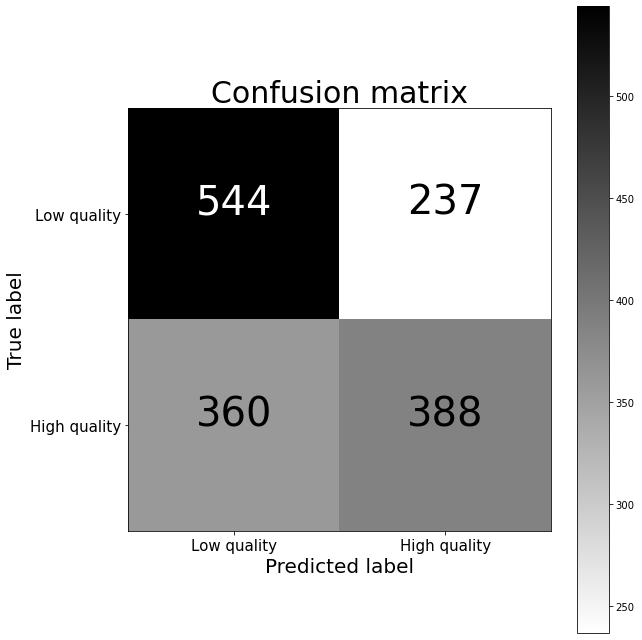

In [11]:
get_confusion_matrix_plot(y_predicted, y_test, figsize=(9, 9))
plt.show()

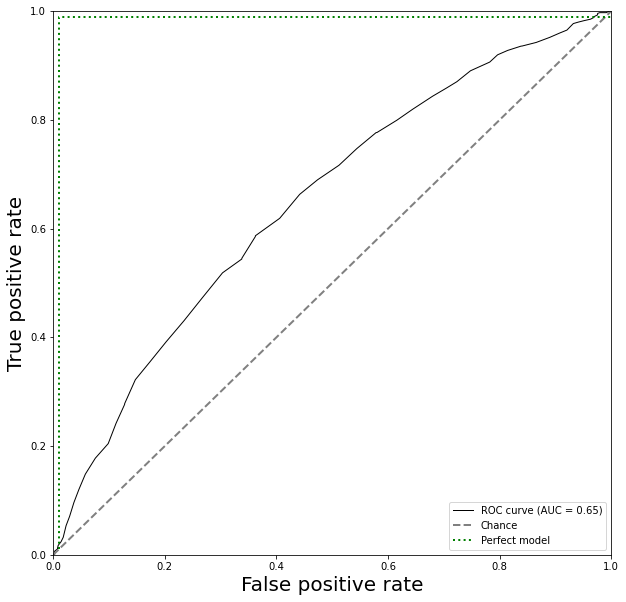

In [13]:
get_roc_plot(y_predicted_proba[:,1], y_test, figsize=(10,10))
plt.savefig('../images/bmlpa_figures/ch05-7.png', dpi=300)
plt.show()

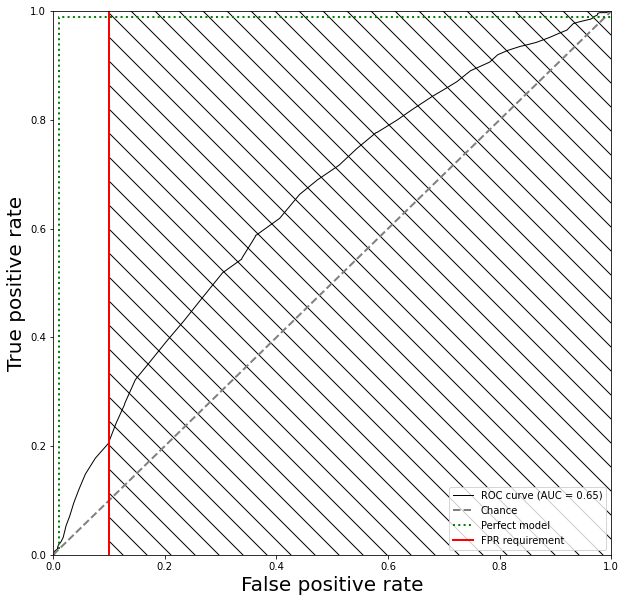

In [14]:
get_roc_plot(y_predicted_proba[:,1], y_test, fpr_bar=.1, figsize=(10,10))
plt.savefig('../images/bmlpa_figures/ch05-8.png', dpi=300)
plt.show()

No handles with labels found to put in legend.


	Brier: 0.234


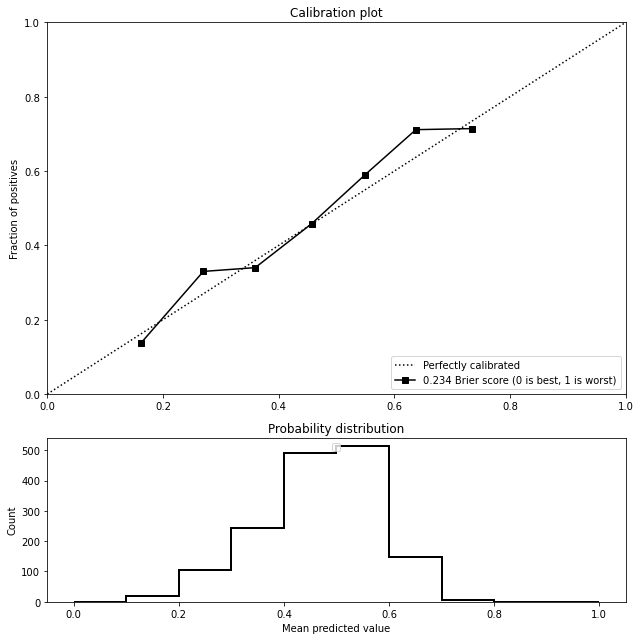

In [26]:
get_calibration_plot(y_predicted_proba[:,1], y_test, figsize=(9,9))
plt.savefig('../images/bmlpa_figures/ch05-9.png', dpi=300)